In [11]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns



# Load data
df = pd.read_excel("C:/Users/Hp/Downloads/Smart_Waste_Fill_Level_Dataset.xlsx")
df

,Bin_ID,Location,Timestamp,Fill_Level_Percentage,Weight_kg,Temperature_C,Humidity_%,Gas_Level_ppm,Bin_Status
0,BIN_50,Sector C,2025-01-01 01:00:00,82,38.43,43.0,67.2,800,Almost Full
1,BIN_17,Sector C,2025-01-01 02:00:00,11,36.67,39.3,62.3,1436,Normal
2,BIN_4,Sector B,2025-01-01 03:00:00,25,17.04,21.7,36.1,804,Normal
3,BIN_3,Sector B,2025-01-01 04:00:00,100,16.98,18.0,67.3,1350,Overflow Risk
4,BIN_32,Residential Block,2025-01-01 05:00:00,48,5.40,31.3,67.3,1169,Normal
...,...,...,...,...,...,...,...,...,...
495,BIN_22,Sector A,2025-01-21 16:00:00,89,4.27,22.6,63.9,1112,Overflow Risk
496,BIN_31,Residential Block,2025-01-21 17:00:00,86,7.77,15.1,31.8,1043,Overflow Risk
497,BIN_12,Residential Block,2025-01-21 18:00:00,98,8.05,23.9,39.0,343,Overflow Risk
498,BIN_5,Sector A,2025-01-21 19:00:00,91,14.28,35.7,45.6,886,Overflow Risk


In [3]:
df.columns

Index(['Bin_ID', 'Location', 'Timestamp', 'Fill_Level_Percentage', 'Weight_kg',
       'Temperature_C', 'Humidity_%', 'Gas_Level_ppm', 'Bin_Status'],
      dtype='object')

In [5]:
df.head()

,Bin_ID,Location,Timestamp,Fill_Level_Percentage,Weight_kg,Temperature_C,Humidity_%,Gas_Level_ppm,Bin_Status
0,BIN_50,Sector C,2025-01-01 01:00:00,82,38.43,43.0,67.2,800,Almost Full
1,BIN_17,Sector C,2025-01-01 02:00:00,11,36.67,39.3,62.3,1436,Normal
2,BIN_4,Sector B,2025-01-01 03:00:00,25,17.04,21.7,36.1,804,Normal
3,BIN_3,Sector B,2025-01-01 04:00:00,100,16.98,18.0,67.3,1350,Overflow Risk
4,BIN_32,Residential Block,2025-01-01 05:00:00,48,5.40,31.3,67.3,1169,Normal


In [6]:
df.shape

(500, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bin_ID                 500 non-null    object        
 1   Location               500 non-null    object        
 2   Timestamp              500 non-null    datetime64[ns]
 3   Fill_Level_Percentage  500 non-null    int64         
 4   Weight_kg              500 non-null    float64       
 5   Temperature_C          500 non-null    float64       
 6   Humidity_%             500 non-null    float64       
 7   Gas_Level_ppm          500 non-null    int64         
 8   Bin_Status             500 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 35.3+ KB


In [9]:
# 3. Data Preprocessing

# Label Encoding
le_bin = LabelEncoder()
le_location = LabelEncoder()
le_status = LabelEncoder()

df['Bin_ID'] = le_bin.fit_transform(df['Bin_ID'])
df['Location'] = le_location.fit_transform(df['Location'])
df['Bin_Status'] = le_status.fit_transform(df['Bin_Status'])

# Convert Timestamp
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['Hour'] = df['Timestamp'].dt.hour
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month

df.drop('Timestamp', axis=1, inplace=True)


# 4. Feature Selection
X = df.drop('Bin_Status', axis=1)
y = df['Bin_Status']


# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


# 6. Feature Scaling
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



Naive Bayes Results
Accuracy: 0.984
[[32  0  1]
 [ 0 69  0]
 [ 1  0 22]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        33
           1       1.00      1.00      1.00        69
           2       0.96      0.96      0.96        23

    accuracy                           0.98       125
   macro avg       0.98      0.98      0.98       125
weighted avg       0.98      0.98      0.98       125


SVM Results
Accuracy: 0.864
[[25  3  5]
 [ 3 66  0]
 [ 6  0 17]]
              precision    recall  f1-score   support

           0       0.74      0.76      0.75        33
           1       0.96      0.96      0.96        69
           2       0.77      0.74      0.76        23

    accuracy                           0.86       125
   macro avg       0.82      0.82      0.82       125
weighted avg       0.86      0.86      0.86       125


Random Forest Results
Accuracy: 1.0
[[33  0  0]
 [ 0 69  0]
 [ 0  0 23]]
              precision 

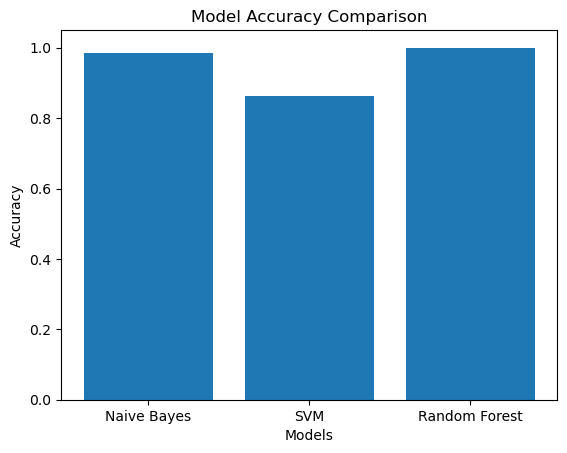

In [13]:
# 7. Naive Bayes Model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)

print("\nNaive Bayes Results")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


# 8. Support Vector Machine Model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

print("\nSVM Results")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


# 9. Random Forest Model
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


# 10. Accuracy Comparison Plot
models = ['Naive Bayes', 'SVM', 'Random Forest']
accuracies = [
    accuracy_score(y_test, y_pred_nb),
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_rf)
]

plt.bar(models, accuracies)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()


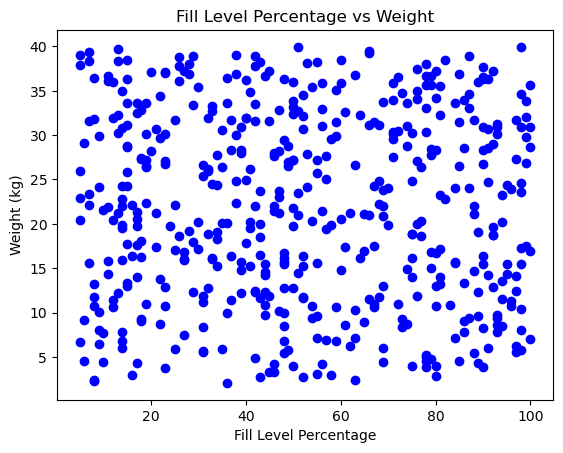

Linear Regression R2 Score: 0.000286271771163249
Linear Regression MSE: 107.71648876991782

Decision Tree R2 Score: -0.162839726137314
Decision Tree MSE: 125.29288011638936


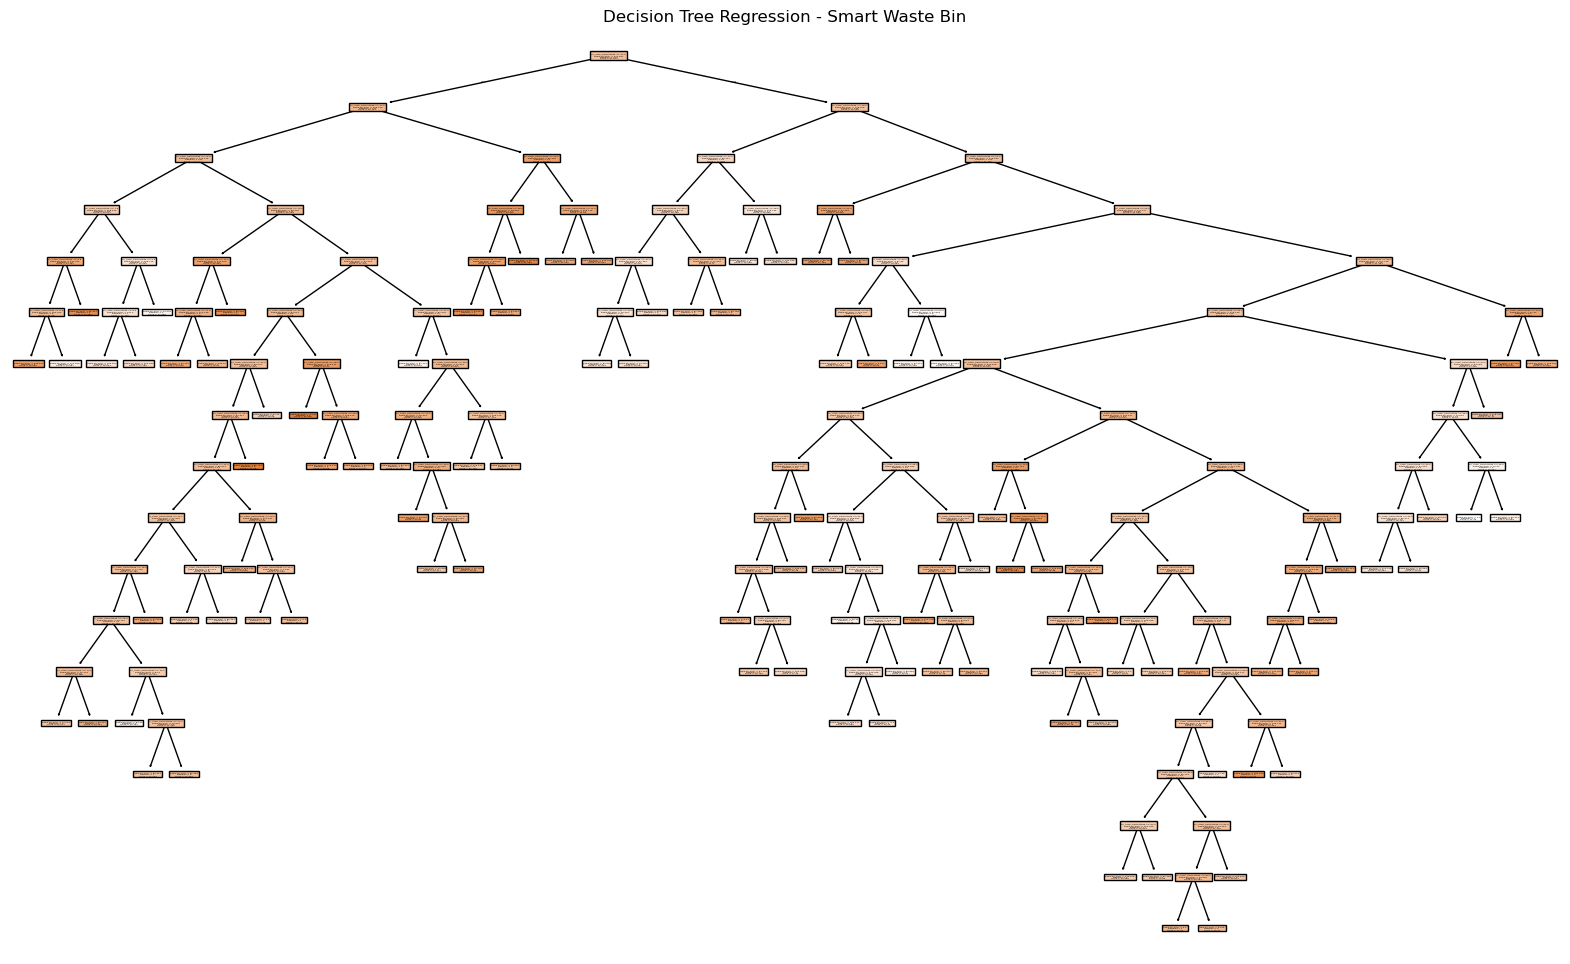

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score


# ================================
# LOAD DATASET
# ================================
df = pd.read_excel("C:/Users/Hp/Downloads/Smart_Waste_Fill_Level_Dataset.xlsx")


# ================================
# SCATTER PLOT
# ================================
plt.scatter(df["Fill_Level_Percentage"], df["Weight_kg"], color='blue', marker='o')
plt.xlabel("Fill Level Percentage")
plt.ylabel("Weight (kg)")
plt.title("Fill Level Percentage vs Weight")
plt.show()


# ================================
# INDEPENDENT & DEPENDENT VARIABLES
# ================================
X = df[['Fill_Level_Percentage']]
y = df['Weight_kg']


# ================================
# TRAIN-TEST SPLIT
# ================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# ================================
# LINEAR REGRESSION MODEL
# ================================
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Linear Regression R2 Score:", r2_score(y_test, y_pred_lr))
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lr))


# ================================
# DECISION TREE REGRESSION
# ================================
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("\nDecision Tree R2 Score:", r2_score(y_test, y_pred_dt))
print("Decision Tree MSE:", mean_squared_error(y_test, y_pred_dt))


# ================================
# DECISION TREE VISUALIZATION
# ================================
plt.figure(figsize=(20, 12))
plot_tree(
    dt,
    feature_names=['Fill_Level_Percentage'],
    filled=True
)
plt.title("Decision Tree Regression - Smart Waste Bin")
plt.show()


In [16]:
import joblib

joblib.dump(lr, "C:/Users/HP/Downloads/smart_waste_lr.pkl")


['C:/Users/HP/Downloads/smart_waste_lr.pkl']

In [17]:
import gradio as gr
import joblib
import numpy as np

# Load trained Linear Regression model
model = joblib.load("C:/Users/HP/Downloads/smart_waste_lr.pkl")

# Prediction function
def predict_weight(fill_level_percentage):
    features = np.array([[fill_level_percentage]])
    prediction = model.predict(features)
    return f"Predicted Waste Weight (kg): {prediction[0]:.2f}"

# Gradio Interface
inputs = gr.Number(label="Fill Level Percentage (%)")
output = gr.Textbox(label="Prediction")

gr.Interface(
    fn=predict_weight,
    inputs=inputs,
    outputs=output,
    title="Smart Waste Bin Weight Predictor",
    description="Predicts waste weight based on bin fill level percentage"
).launch()

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


In [18]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder


# ================================
# LOAD DATASET
# ================================
df = pd.read_excel("C:/Users/Hp/Downloads/Smart_Waste_Fill_Level_Dataset.xlsx")


# ================================
# FEATURE SELECTION
# ================================
X = df[['Fill_Level_Percentage', 'Weight_kg', 'Temperature_C',
        'Humidity_%', 'Gas_Level_ppm']]

y = df['Bin_Status']


# ================================
# ENCODE TARGET VARIABLE
# ================================
le = LabelEncoder()
y = le.fit_transform(y)


# ================================
# TRAIN-TEST SPLIT
# ================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# ================================
# DECISION TREE CLASSIFIER
# ================================
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)


# ================================
# PREDICTION
# ================================
y_predict = dt.predict(X_test)


# ================================
# EVALUATION
# ================================
print("Accuracy:", accuracy_score(y_test, y_predict))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_predict))
print("Classification Report:\n", classification_report(y_test, y_predict))

Accuracy: 1.0
Confusion Matrix:
 [[22  0  0]
 [ 0 58  0]
 [ 0  0 20]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        58
           2       1.00      1.00      1.00        20

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

